In [10]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

from sentence_transformers import SentenceTransformer
st = SentenceTransformer("xlm-r-bert-base-nli-stsb-mean-tokens")
from utils import read_text_file, cosine_distance, get_pairwise_metric_matrix, scatter_with_annotations

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
emb = st.encode("Nous sommes l'association étudiante d'informatique et de Machine Learning")

In [13]:
emb

array([-0.5116063 , -0.1702759 ,  0.6000131 ,  0.26557836,  0.24356903,
       -0.5051963 ,  0.14486994,  0.56502074, -0.0753578 , -0.5102079 ,
       -0.22702391,  0.35609567, -0.23093054,  0.26107812, -0.3869759 ,
       -0.5252484 , -0.5532406 , -0.25615817,  0.27370295, -0.10037812,
       -0.15237667, -0.5707825 ,  0.2596572 ,  0.03321819, -0.30191293,
        0.2067276 , -0.2048009 , -0.22832243, -0.3575661 ,  0.42973602,
       -0.20679839,  0.10766684,  0.6340269 ,  0.01528941,  0.08671219,
       -0.4291401 ,  0.4868241 ,  0.45528275,  0.24717744,  0.23606427,
       -0.2131108 , -0.36790106, -0.09374759, -0.22373512, -0.70046127,
       -0.856228  , -1.2547975 ,  0.49451774,  0.3805096 , -0.32384408,
       -0.94045925,  1.0581636 ,  0.13868295,  0.15416975, -0.6199382 ,
        0.7472584 ,  0.4819641 , -0.7709082 ,  0.15738851,  0.2881516 ,
       -0.6516412 ,  0.0819158 ,  0.23311074,  0.09430356, -0.03676318,
        0.4221284 ,  1.4451733 , -0.41355646, -0.624521  , -0.03

In [14]:
inputs = [
    "Bonjour ! Comment ça va ? :)",
    "Salut mon vieux, ça gaze ?",
    "Putain je te déteste va mourir",
    "Hey man, it's nice to see you!",
    "Fuck this shit I hate you!!!",
]
labels = ["gentil_1", "gentil_2", "méchant", "gentil_en", "méchant_en"]

emb = st.encode(inputs, device="cpu")

In [15]:
get_pairwise_metric_matrix(emb, metric="cosine_dist", labels=labels).round(2)

,gentil_1,gentil_2,méchant,gentil_en,méchant_en
gentil_1,0.00,0.15,0.50,0.24,0.48
gentil_2,0.15,0.00,0.46,0.23,0.44
méchant,0.50,0.46,0.00,0.52,0.13
gentil_en,0.24,0.23,0.52,0.00,0.49
méchant_en,0.48,0.44,0.13,0.49,0.00


In [16]:
pca = PCA(2).fit_transform(emb)

<AxesSubplot:>

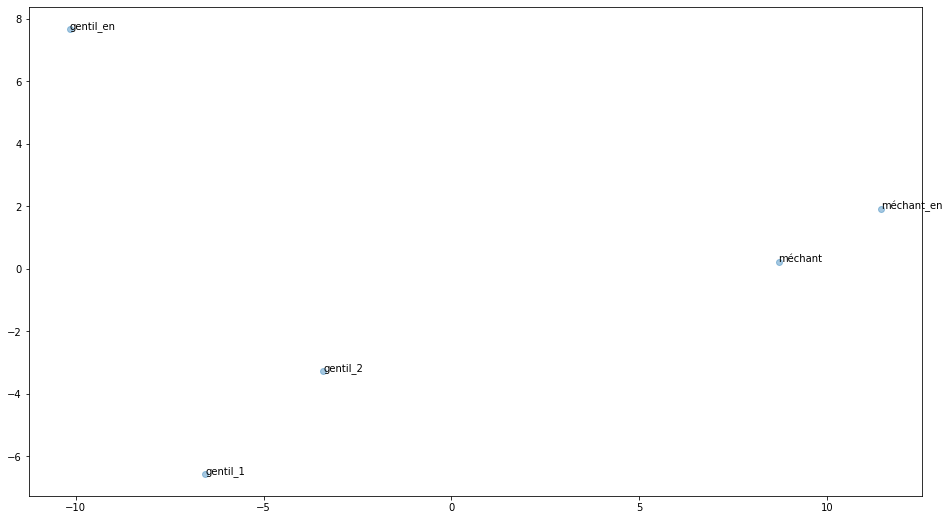

In [17]:
scatter_with_annotations(pca, labels)

In [18]:
inputs = [
    "I am a cow",
    "My nature is that of a bovine",
    "Je suis un mammifère connu pour son lait et sa viande rouge",
    "L'informatique c'est vraiment un truc de cracks !",
    "According to Tux, computer scientists are the best !",
    "Machine Learning is a revolutionary tool"
]
labels = ["vache_1", "vache_2", "vache_3", "informatique_1", "informatique_2", "informatique_3"]

emb = st.encode(inputs, device="cpu")

<AxesSubplot:>

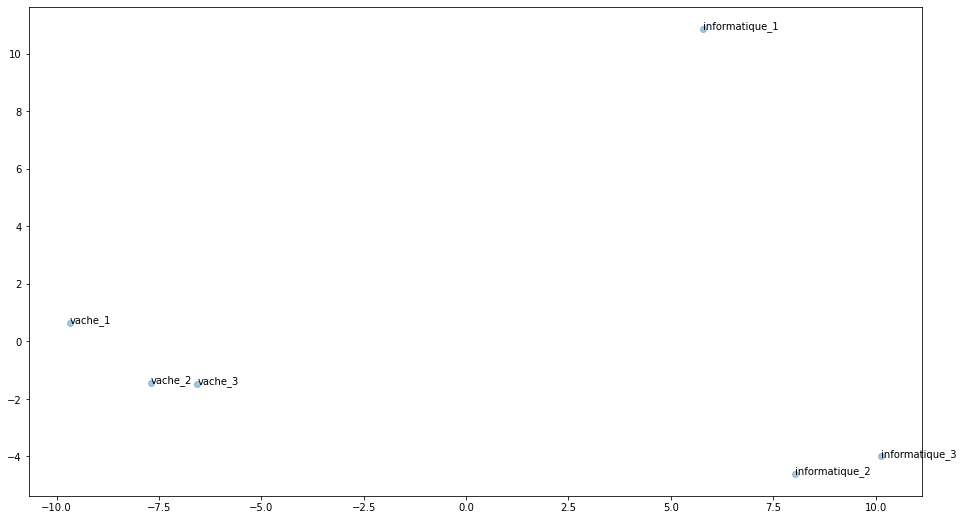

In [19]:
pca = PCA(2).fit_transform(emb)
scatter_with_annotations(pca, labels)

In [20]:
emb.shape

(6, 768)